In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/DataScienceCodingChallenge/data/sample_temperature_data_for_coding_challenge.csv")
df.head()

,source_id,datetime,property_name,temperature
0,MICDEV001,2019-04-13T17:51:16.000+0000,heating_temperature,33.3
1,MICDEV001,2019-04-13T17:51:16.000+0000,cooling_temperature,15.0
2,MICDEV001,2019-04-13T18:51:18.000+0000,heating_temperature,34.0
3,MICDEV001,2019-04-13T19:51:20.000+0000,heating_temperature,33.8
4,MICDEV001,2019-04-13T20:51:21.000+0000,heating_temperature,34.2


In [40]:
df["datetime"] = pd.to_datetime(df["datetime"]) # convert to datetime object
df["date"] = df["datetime"].apply(lambda x: x.date())
df["time"] = df["datetime"].apply(lambda x: x.time())
df.head()

,source_id,datetime,property_name,temperature,date,time
0,MICDEV001,2019-04-13 17:51:16+00:00,heating_temperature,33.3,2019-04-13,17:51:16
1,MICDEV001,2019-04-13 17:51:16+00:00,cooling_temperature,15.0,2019-04-13,17:51:16
2,MICDEV001,2019-04-13 18:51:18+00:00,heating_temperature,34.0,2019-04-13,18:51:18
3,MICDEV001,2019-04-13 19:51:20+00:00,heating_temperature,33.8,2019-04-13,19:51:20
4,MICDEV001,2019-04-13 20:51:21+00:00,heating_temperature,34.2,2019-04-13,20:51:21


In [7]:
# check missing values / null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   source_id      1000 non-null   object 
 1   datetime       1000 non-null   object 
 2   property_name  1000 non-null   object 
 3   temperature    1000 non-null   float64
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


In [18]:
df.isna().sum()

source_id        0
datetime         0
property_name    0
temperature      0
dtype: int64

In [12]:
# check data distribution of each column
print("Unique data sources: ", df["source_id"].nunique())
print("Unique properties : ", df["property_name"].nunique()) # heating_temp & cooling_temp

Unique data sources:  1
Unique properties :  2


<Axes: >

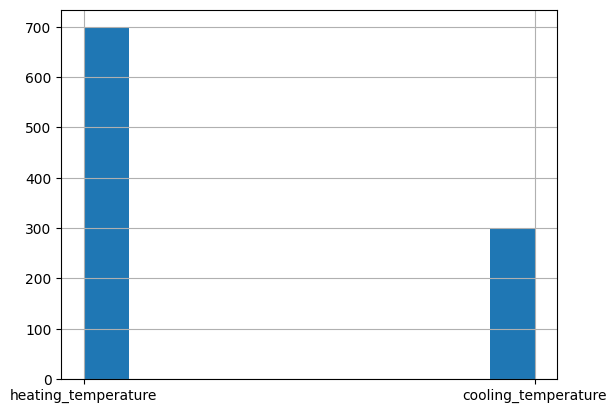

In [19]:
# TODO: add x/y axis labels, titles, and a legend
df["property_name"].hist()

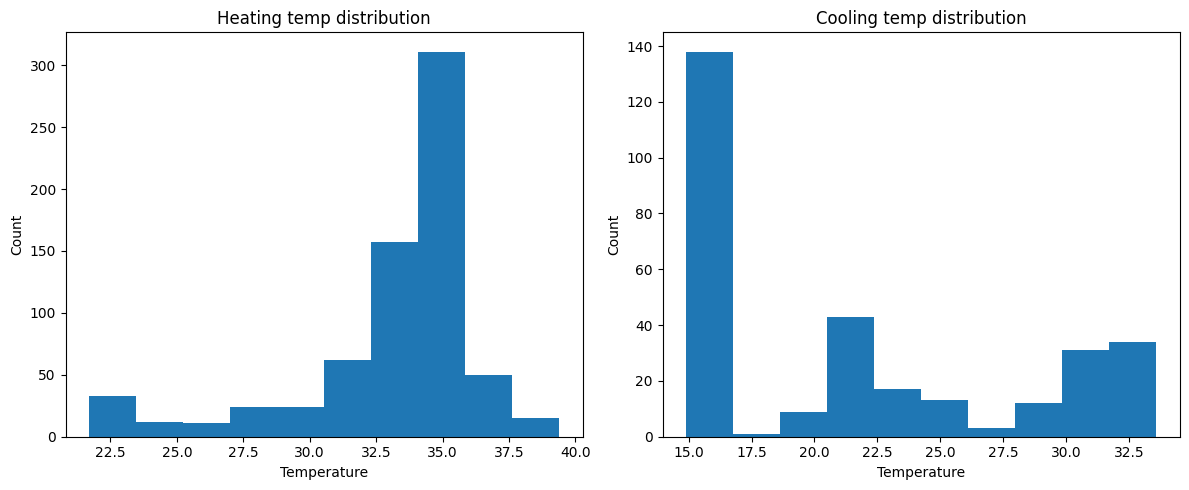

In [29]:
fig = plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df[df["property_name"] == "heating_temperature"]["temperature"], bins=10)
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.title("Heating temp distribution")

plt.subplot(1, 2, 2)
plt.hist(df[df["property_name"] == "cooling_temperature"]["temperature"], bins=10)
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.title("Cooling temp distribution")

fig.tight_layout()

In [41]:
# time data
df["datetime"].min(), df["datetime"].max()

(Timestamp('2019-04-13 17:51:16+0000', tz='UTC'),
 Timestamp('2020-01-24 08:56:36+0000', tz='UTC'))

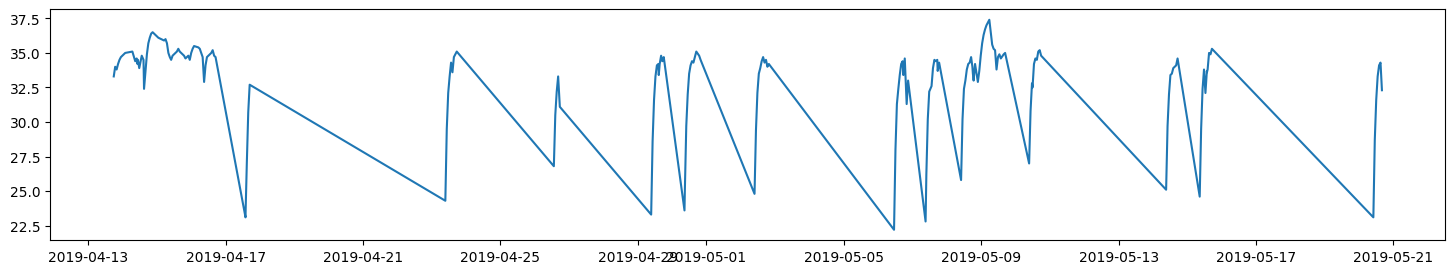

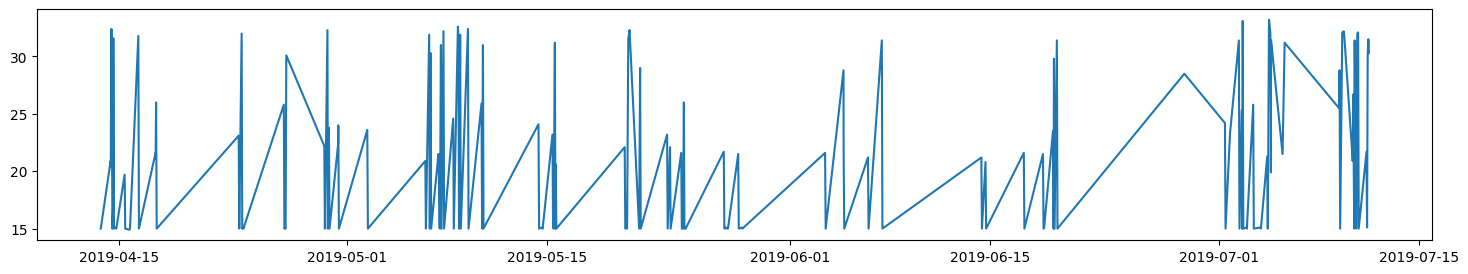

In [48]:
fig = plt.figure(figsize=(18, 3))
sub_df = df[df.property_name == "heating_temperature"].iloc[:200, :]
plt.plot(sub_df.datetime, sub_df.temperature)

fig = plt.figure(figsize=(18, 3))
sub_df = df[df.property_name == "cooling_temperature"].iloc[:200, :]
plt.plot(sub_df.datetime, sub_df.temperature)